<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(2)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_2'

In [4]:
os.listdir(base_path)

['data_multi_delta_2_n20.csv',
 'data_multi_delta_2_n250.csv',
 'data_multi_delta_2_n120.csv',
 'data_multi_delta_2_n30.csv',
 'data_multi_delta_2_n60.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,96.050906,83.489128,189.540035,100.803815,88.736220
1,0.0,1.0,46.399267,-83.874223,-27.474956,54.141344,-81.616299
2,0.0,2.0,99.793337,-17.619096,92.174241,104.320941,-12.146700
3,0.0,3.0,86.597085,64.566785,161.163870,91.919140,69.244730
4,0.0,4.0,54.545202,-83.246965,-18.701763,61.796870,-80.498633
...,...,...,...,...,...,...,...
249995,999.0,245.0,61.705100,-10.951061,60.754039,74.805159,-14.051120
249996,999.0,246.0,69.756326,-29.816270,49.940056,83.978157,-34.038101
249997,999.0,247.0,39.625528,-19.720294,29.905234,49.649254,-19.744020
249998,999.0,248.0,24.563744,-2.439201,32.124543,32.488921,-0.364378


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,96.050906,83.489128,189.540035,100.803815,88.736220
1,0.0,1.0,46.399267,-83.874223,-27.474956,54.141344,-81.616299
2,0.0,2.0,99.793337,-17.619096,92.174241,104.320941,-12.146700
3,0.0,3.0,86.597085,64.566785,161.163870,91.919140,69.244730
4,0.0,4.0,54.545202,-83.246965,-18.701763,61.796870,-80.498633
...,...,...,...,...,...,...,...
249995,999.0,245.0,61.705100,-10.951061,60.754039,74.805159,-14.051120
249996,999.0,246.0,69.756326,-29.816270,49.940056,83.978157,-34.038101
249997,999.0,247.0,39.625528,-19.720294,29.905234,49.649254,-19.744020
249998,999.0,248.0,24.563744,-2.439201,32.124543,32.488921,-0.364378


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    96.050906   83.489128  189.540035  100.803815   88.736220
      1.0    46.399267  -83.874223  -27.474956   54.141344  -81.616299
      2.0    99.793337  -17.619096   92.174241  104.320941  -12.146700
      3.0    86.597085   64.566785  161.163870   91.919140   69.244730
      4.0    54.545202  -83.246965  -18.701763   61.796870  -80.498633
...                ...         ...         ...         ...         ...
999.0 245.0  61.705100  -10.951061   60.754039   74.805159  -14.051120
      246.0  69.756326  -29.816270   49.940056   83.978157  -34.038101
      247.0  39.625528  -19.720294   29.905234   49.649254  -19.744020
      248.0  24.563744   -2.439201   32.124543   32.488921   -0.364378
      249.0  86.779229 -241.836932 -145.057702  103.372851 -248.430553

[250000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    96.050906   83.489128  189.540035  100.803815   88.736220
      1.0    46.399267  -83.874223  -27.474956   54.141344  -81.616299
      2.0    99.793337  -17.619096   92.174241  104.320941  -12.146700
      3.0    86.597085   64.566785  161.163870   91.919140   69.244730
      4.0    54.545202  -83.246965  -18.701763   61.796870  -80.498633
...                ...         ...         ...         ...         ...
999.0 245.0  61.705100  -10.951061   60.754039   74.805159  -14.051120
      246.0  69.756326  -29.816270   49.940056   83.978157  -34.038101
      247.0  39.625528  -19.720294   29.905234   49.649254  -19.744020
      248.0  24.563744   -2.439201   32.124543   32.488921   -0.364378
      249.0  86.779229 -241.836932 -145.057702  103.372851 -248.430553

[250000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,96.050906,83.489128,189.540035,100.803815,88.736220
1,0.0,1.0,46.399267,-83.874223,-27.474956,54.141344,-81.616299
2,0.0,2.0,99.793337,-17.619096,92.174241,104.320941,-12.146700
3,0.0,3.0,86.597085,64.566785,161.163870,91.919140,69.244730
4,0.0,4.0,54.545202,-83.246965,-18.701763,61.796870,-80.498633
...,...,...,...,...,...,...,...
249995,999.0,245.0,61.705100,-10.951061,60.754039,74.805159,-14.051120
249996,999.0,246.0,69.756326,-29.816270,49.940056,83.978157,-34.038101
249997,999.0,247.0,39.625528,-19.720294,29.905234,49.649254,-19.744020
249998,999.0,248.0,24.563744,-2.439201,32.124543,32.488921,-0.364378


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    96.050906   83.489128  189.540035  100.803815   88.736220
      1.0    46.399267  -83.874223  -27.474956   54.141344  -81.616299
      2.0    99.793337  -17.619096   92.174241  104.320941  -12.146700
      3.0    86.597085   64.566785  161.163870   91.919140   69.244730
      4.0    54.545202  -83.246965  -18.701763   61.796870  -80.498633
...                ...         ...         ...         ...         ...
999.0 245.0  61.705100  -10.951061   60.754039   74.805159  -14.051120
      246.0  69.756326  -29.816270   49.940056   83.978157  -34.038101
      247.0  39.625528  -19.720294   29.905234   49.649254  -19.744020
      248.0  24.563744   -2.439201   32.124543   32.488921   -0.364378
      249.0  86.779229 -241.836932 -145.057702  103.372851 -248.430553

[250000 rows x 5 columns]

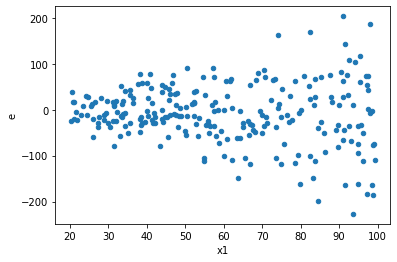

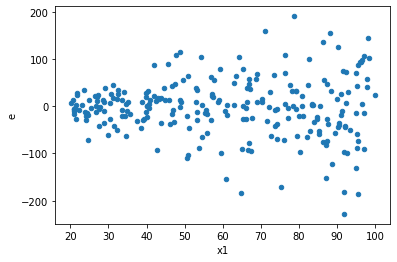

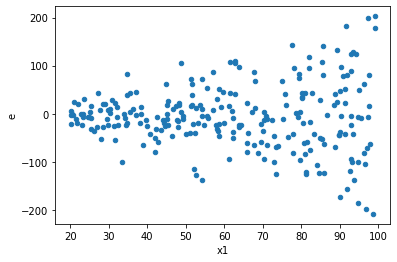

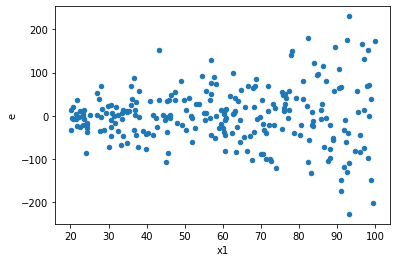

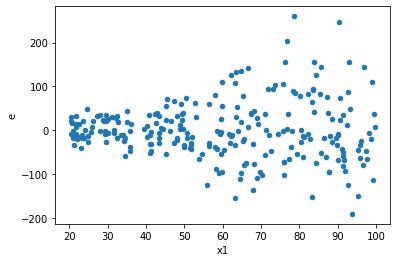

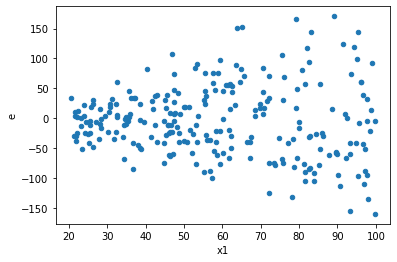

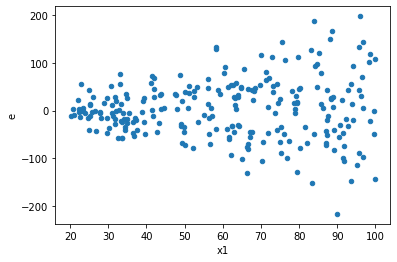

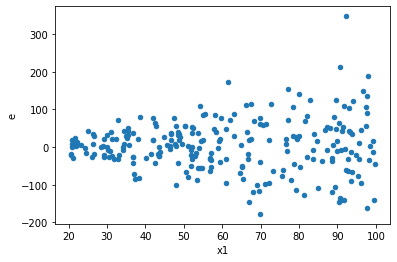

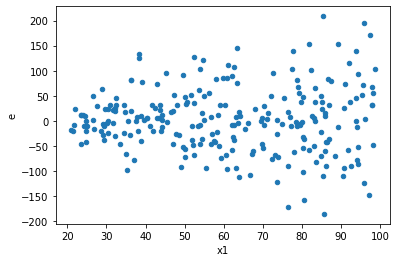

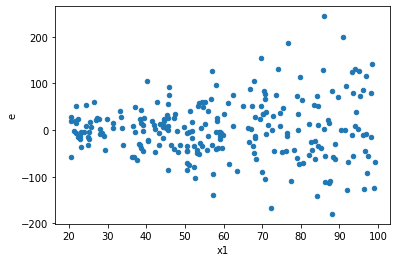

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,99.0,99.0,193163.46530219607,930781.0755102368,1951.1461141635966,9401.829045557948,4.8186186453741096,9.325873406851315e-14,0.9999999999999534,4.6629367034256575e-14,Reject005=0 : Heteroscedasticity
1.0,99.0,99.0,141232.5166699763,693813.0492101769,1426.591077474508,7008.212618284615,4.912558846709769,4.929390229335695e-14,0.9999999999999754,2.4646951146678475e-14,Reject005=0 : Heteroscedasticity
2.0,99.0,99.0,110526.86014349437,926554.8976773581,1116.4329307423675,9359.140380579374,8.383074453344951,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
3.0,99.0,99.0,130430.69689942378,914144.967986028,1317.4817868628666,9233.787555414423,7.008664292355447,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
4.0,99.0,99.0,107640.28798355041,713513.0508153932,1087.275636197479,7207.20253348882,6.628680247719444,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
5.0,99.0,99.0,114638.20163628052,743884.7699844426,1157.9616326897021,7513.98757560043,6.488978014018489,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
6.0,99.0,99.0,137985.29600923767,786049.5990207229,1393.7908687801785,7939.894939603261,5.696618565561503,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
7.0,99.0,99.0,111069.99083603815,710384.831052754,1121.9190993539207,7175.604354068222,6.395830464246875,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,99.0,99.0,117303.52625286582,587456.366930166,1184.8841035643013,5933.902696264303,5.00800262102789,2.5979218776228663e-14,0.999999999999987,1.2989609388114332e-14,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,99.0,99.0,193163.46530219607,930781.0755102368,1951.1461141635966,9401.829045557948,4.8186186453741096,9.325873406851315e-14,Reject005=0 : Heteroscedasticity
1.0,99.0,99.0,141232.5166699763,693813.0492101769,1426.591077474508,7008.212618284615,4.912558846709769,4.929390229335695e-14,Reject005=0 : Heteroscedasticity
2.0,99.0,99.0,110526.86014349437,926554.8976773581,1116.4329307423675,9359.140380579374,8.383074453344951,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,99.0,99.0,130430.69689942378,914144.967986028,1317.4817868628666,9233.787555414423,7.008664292355447,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,99.0,99.0,107640.28798355041,713513.0508153932,1087.275636197479,7207.20253348882,6.628680247719444,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,99.0,99.0,114638.20163628052,743884.7699844426,1157.9616326897021,7513.98757560043,6.488978014018489,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,99.0,99.0,137985.29600923767,786049.5990207229,1393.7908687801785,7939.894939603261,5.696618565561503,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,99.0,99.0,111069.99083603815,710384.831052754,1121.9190993539207,7175.604354068222,6.395830464246875,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,99.0,99.0,117303.52625286582,587456.366930166,1184.8841035643013,5933.902696264303,5.00800262102789,2.5979218776228663e-14,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64